In [ ]:
# https://pythonexamples.org/pandas-dataframe-query/

In [ ]:
"""
A merge_ordered() function allows combining time series and other ordered 
data. In particular it has optional fill_method keyword to fill/interpolate 
missing data:

"""

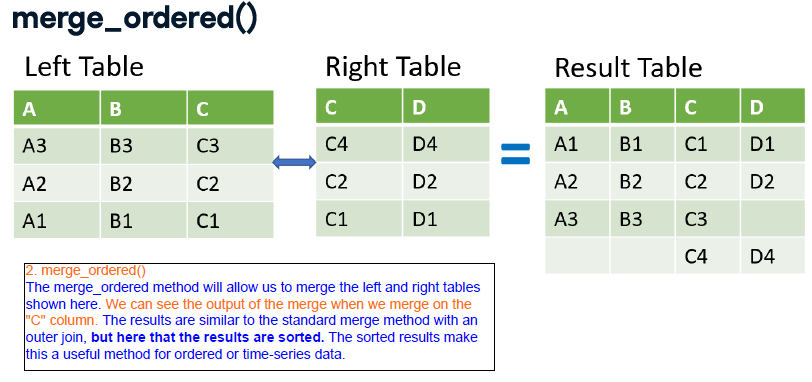

In [ ]:
"""
Although, the default for the merge method is "inner", it is "outer" for 
merge_order method. Also, both methods support suffixes for overlapping 
column names. However, how you call each of the methods is different. 
Earlier in the course, we called the merge method by first listing a table 
and calling the method afterward. For merge_ordered(), you'll need to first 
call pandas then merge_ordered().

"""

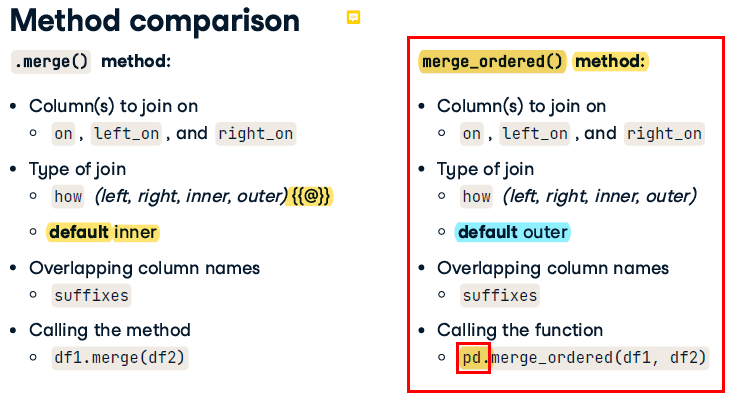

In [8]:
import pandas as pd
aal = pd.read_csv('./Data/aal.csv')
pfe = pd.read_csv('./Data/pfe.csv')
# pd.merge_ordered(aal, pfe, on = 'date', suffixes = ('_aal', '_pfe'))

In [9]:
left = pd.DataFrame(
    {"k": ["K0", "K1", "K1", "K2"], "lv": [1, 2, 3, 4], "s": ["a", "b", "c", "d"]}
)


right = pd.DataFrame({"k": ["K1", "K2", "K4"], "rv": [1, 2, 3]})

pd.merge_ordered(left, right, fill_method="ffill", left_by="s")

,k,lv,s,rv
0,K0,1.0,a,NaN
1,K1,1.0,a,1.0
2,K2,1.0,a,2.0
3,K4,1.0,a,3.0
4,K1,2.0,b,1.0
5,K2,2.0,b,2.0
6,K4,2.0,b,3.0
7,K1,3.0,c,1.0
8,K2,3.0,c,2.0
9,K4,3.0,c,3.0


## merge_asof()

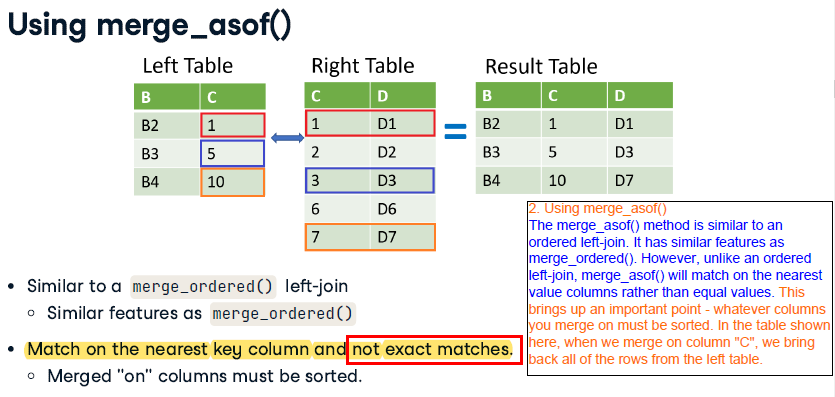

In [ ]:
"""
A merge_asof() is similar to an ordered left-join except that we match on 
nearest key rather than equal keys. For each row in the left DataFrame, we 
select the last row in the right DataFrame whose on key is less than the 
left’s key. Both DataFrames must be sorted by the key.

Optionally an asof merge can perform a group-wise merge. This matches the 
by key equally, in addition to the nearest match on the on key.


"""

In [10]:
trades = pd.DataFrame(
    {
        "time": pd.to_datetime(
            [
                "20160525 13:30:00.023",
                "20160525 13:30:00.038",
                "20160525 13:30:00.048",
                "20160525 13:30:00.048",
                "20160525 13:30:00.048",
            ]
        ),
        "ticker": ["MSFT", "MSFT", "GOOG", "GOOG", "AAPL"],
        "price": [51.95, 51.95, 720.77, 720.92, 98.00],
        "quantity": [75, 155, 100, 100, 100],
    },
    columns=["time", "ticker", "price", "quantity"],
)


quotes = pd.DataFrame(
    {
        "time": pd.to_datetime(
            [
                "20160525 13:30:00.023",
                "20160525 13:30:00.023",
                "20160525 13:30:00.030",
                "20160525 13:30:00.041",
                "20160525 13:30:00.048",
                "20160525 13:30:00.049",
                "20160525 13:30:00.072",
                "20160525 13:30:00.075",
            ]
        ),
        "ticker": ["GOOG", "MSFT", "MSFT", "MSFT", "GOOG", "AAPL", "GOOG", "MSFT"],
        "bid": [720.50, 51.95, 51.97, 51.99, 720.50, 97.99, 720.50, 52.01],
        "ask": [720.93, 51.96, 51.98, 52.00, 720.93, 98.01, 720.88, 52.03],
    },
    columns=["time", "ticker", "bid", "ask"],
)

In [11]:
trades

,time,ticker,price,quantity
0,2016-05-25 13:30:00.023,MSFT,51.95,75
1,2016-05-25 13:30:00.038,MSFT,51.95,155
2,2016-05-25 13:30:00.048,GOOG,720.77,100
3,2016-05-25 13:30:00.048,GOOG,720.92,100
4,2016-05-25 13:30:00.048,AAPL,98.00,100


In [12]:
quotes

,time,ticker,bid,ask
0,2016-05-25 13:30:00.023,GOOG,720.50,720.93
1,2016-05-25 13:30:00.023,MSFT,51.95,51.96
2,2016-05-25 13:30:00.030,MSFT,51.97,51.98
3,2016-05-25 13:30:00.041,MSFT,51.99,52.00
4,2016-05-25 13:30:00.048,GOOG,720.50,720.93
5,2016-05-25 13:30:00.049,AAPL,97.99,98.01
6,2016-05-25 13:30:00.072,GOOG,720.50,720.88
7,2016-05-25 13:30:00.075,MSFT,52.01,52.03


In [13]:
pd.merge_asof(trades, quotes, on="time", by="ticker")

,time,ticker,price,quantity,bid,ask
0,2016-05-25 13:30:00.023,MSFT,51.95,75,51.95,51.96
1,2016-05-25 13:30:00.038,MSFT,51.95,155,51.97,51.98
2,2016-05-25 13:30:00.048,GOOG,720.77,100,720.50,720.93
3,2016-05-25 13:30:00.048,GOOG,720.92,100,720.50,720.93
4,2016-05-25 13:30:00.048,AAPL,98.00,100,NaN,NaN


## .query() method

In [ ]:
# Example 1: Query DataFrame with Condition on Single Column

In [14]:
import pandas as pd

#initialize a dataframe
df = pd.DataFrame(
	[[21, 72, 67],
	[23, 78, 62],
	[32, 74, 56],
	[73, 88, 67],
	[32, 74, 56],
	[43, 78, 69],
	[32, 74, 54],
	[52, 54, 76]],
	columns=['a', 'b', 'c'])

#query single column
df1 = df.query('a>50')

#print the dataframe
print(df1)

    a   b   c
3  73  88  67
7  52  54  76


In [ ]:
# Example 2: Query DataFrame with Condition on Multiple Columns using AND operator

In [15]:
import pandas as pd

#initialize a dataframe
df = pd.DataFrame(
	[[21, 72, 67],
	[23, 78, 62],
	[32, 74, 56],
	[73, 88, 67],
	[32, 74, 56],
	[43, 78, 69],
	[32, 74, 54],
	[52, 54, 76]],
	columns=['a', 'b', 'c'])

#query multiple columns
df1 = df.query('a>30 and c>60')

#print the dataframe
print(df1)

    a   b   c
3  73  88  67
5  43  78  69
7  52  54  76


## .melt()

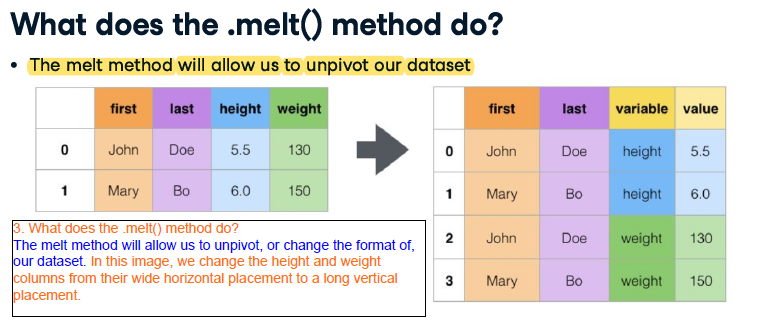

In [19]:
import pandas as pd

social_fin = pd.read_csv('./Data/social_fin.csv')
print(social_fin)

   Unnamed: 0      financial   company      2019      2018
0           0  total_revenue   twitter   3459329   3042359
1           1   gross_profit   twitter   2322288   2077362
2           2     net_income   twitter   1465659   1205596
3           3  total_revenue  facebook  70697000   5583000
4           4   gross_profit  facebook  57927000  46483000


In [18]:
social_fin_tall = social_fin.melt(id_vars=['financial','company'])
print(social_fin)

   Unnamed: 0      financial   company      2019      2018
0           0  total_revenue   twitter   3459329   3042359
1           1   gross_profit   twitter   2322288   2077362
2           2     net_income   twitter   1465659   1205596
3           3  total_revenue  facebook  70697000   5583000
4           4   gross_profit  facebook  57927000  46483000
